In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *
import glob
import pandas as pd
from matplotlib.lines import Line2D
markers=list(Line2D.markers)
import seaborn as sns
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
#plotting parameters to make presentable plots
#sns.set(font_scale=1.25,style='white', palette='deep')#,rc = {'figure.figsize':(10,5)})#,font_style='bold') # font='SF Hello'

### Load Data

In [2]:
files = glob.glob('../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data/*.xlsx')

In [3]:
files

['../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=150nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=160nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=170nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=180nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=190nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=200nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=210nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=220nm.xlsx',
 '../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/Data\\240206 - x_pol_S1=230nm.xlsx']

In [4]:
data_list = []
S1_list = []

for i in range(len(files)):
    data = pd.read_excel(files[i],index_col=None)#,usecols=range(8))
    # S1 = int(files[i].split('=')[-1][:-7])
    # S1 = int(files[i].split('_')[-2][3:6])
    # data['S1_nm'] = S1
    # data['Qnr'] = 999
    data_list.append(data)
    # S1_list.append(S1)
    # filename=files[i].split('\\')[1]
    # data.to_excel('Data/'+filename,index=False)
    # print(len(data.columns))
main_df = pd.concat(data_list)
# S1_list.reverse()

S1_list=list(set(main_df['S1_nm']))
S1_list.sort()

In [5]:
S1_list

[150, 160, 170, 180, 190, 200, 210, 220, 230]

In [6]:
main_df

,THGWavelength_nm,THG_Forward,THG_Backward,PumpWavelength_nm,LinearTransmission,LinearReflection,RelativeFieldEnhancement,S1_nm,Qnr
0,483.333333,2.572842e-09,1.241794e-10,1450.0,0.238897,0.739138,2.750129,150,999
1,485.000000,2.454242e-09,1.851129e-10,1455.0,0.240063,0.737362,2.588603,150,999
2,486.666667,3.063717e-09,1.447586e-10,1460.0,0.240090,0.736857,2.600759,150,999
3,488.333333,3.233200e-09,2.390391e-10,1465.0,0.240397,0.736522,2.571070,150,999
4,490.000000,3.310127e-09,6.503143e-11,1470.0,0.237385,0.741250,2.614131,150,999
...,...,...,...,...,...,...,...,...,...
36,560.000000,1.656874e-08,3.628617e-09,1680.0,0.513121,0.437456,2.751400,230,999
37,561.666667,1.248783e-08,4.531817e-09,1685.0,0.538968,0.415843,2.666900,230,999
38,563.333333,7.778537e-09,6.497957e-09,1690.0,0.560667,0.397360,2.602600,230,999
39,565.000000,7.102056e-09,6.380673e-09,1695.0,0.574978,0.383336,2.536200,230,999


### Plot raw data

Text(0, 0.5, 'Transmission (Arb. Units)')

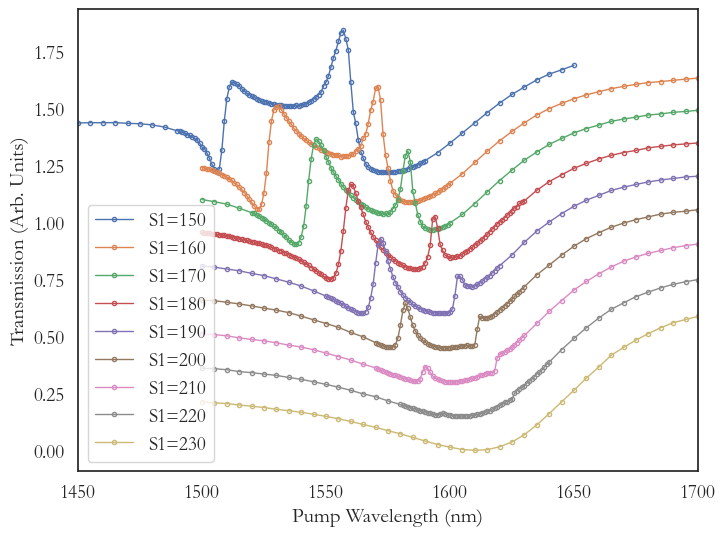

In [7]:
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
plt.figure(figsize=(8,6))

spacing = 0.15
for i in range(len(S1_list)):
    if S1_list[i] == -1:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearTransmission ']+stack_sep,label='S1=%d' %((S1_list[i]) ),#label=r'%snm ($\alpha$=%0.2f)' %(S1_list[i],(230-S1_list[i])/230 ),
                 linewidth=1,marker='o',fillstyle='none',markersize=3)
plt.legend(loc=3)
plt.xlim(1450,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Transmission (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Transmisssion.png',dpi=200)

Text(0, 0.5, 'Reflection (Arb. Units)')

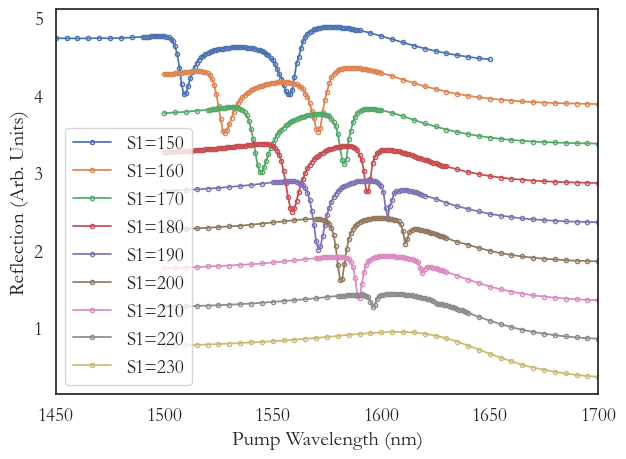

In [10]:
plt.figure(figsize=(7,5))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 0.5
for i in range(len(S1_list)):
    if S1_list[i] == 0:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection']+stack_sep,label='S1=%d' %(S1_list[i]),
                 marker='o',fillstyle='none',markersize=3, linewidth=1.25)
plt.legend(loc=3)
plt.xlim(1450,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/Reflection.png',dpi=200)

Text(0, 0.5, 'Pump Field Enhancement (Arb. Units)')

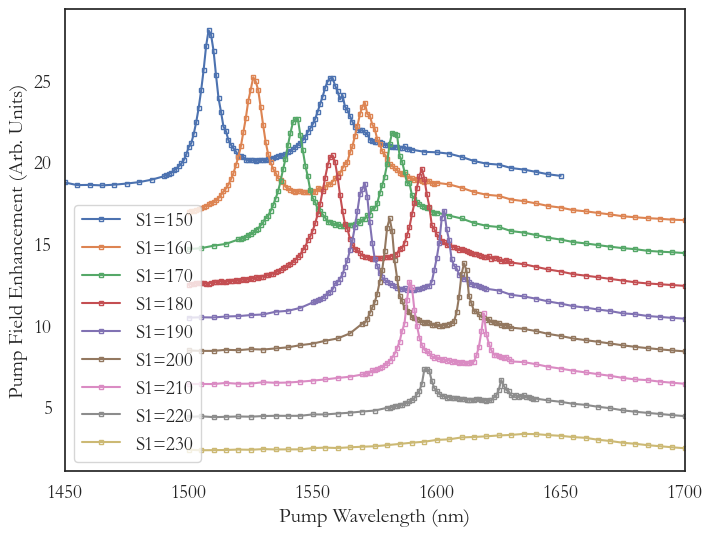

In [11]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')
spacing = 2.0
for i in range(len(S1_list)):
    if S1_list[i] == -1:
        continue
    else:
        sub_df = main_df[main_df['S1_nm']==S1_list[i]]
        stack_sep = spacing*(len(S1_list)-1-i)
        plt.plot(sub_df['PumpWavelength_nm'],sub_df['RelativeFieldEnhancement']+stack_sep,label='S1=%d' %(S1_list[i]),
                 linewidth=1.5,marker='s',fillstyle='none',markersize=3, )
plt.legend(loc=3)
plt.xlim(1450,1700)
plt.xlabel('Pump Wavelength (nm)')
plt.ylabel('Pump Field Enhancement (Arb. Units)')
# plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/RelEnhancement.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Forward) (Arb. Units)')

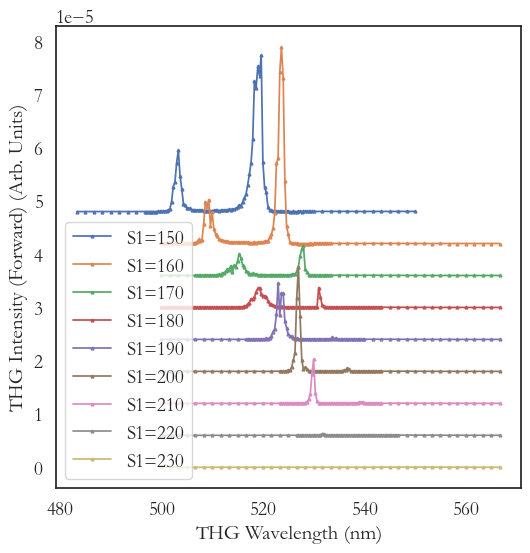

In [12]:
plt.figure(figsize=(6,6))
spacing=6e-6
for i in range(len(S1_list)):
    sub_df = main_df[main_df['S1_nm']==S1_list[i]]
    stack_sep = spacing*(len(S1_list)-1-i)
    #if S1_list[i] >= 220:
    #   plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Forward']*0+stack_sep,label=r'$\alpha$=%0.2f' %((230-S1_list[i])/230 ),
    #             linewidth=1.25, marker='^',fillstyle='none',markersize=4, )
    #else:
    plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Forward']+stack_sep,label='S1=%d' %((S1_list[i]) ),
                 linewidth=1.25,marker='^',fillstyle='none',markersize=2, )
plt.legend(loc=3)
#plt.ylim(-0.1e-5,7e-5)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel('THG Intensity (Forward) (Arb. Units)')
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Forward.png',dpi=200)

Text(0, 0.5, 'THG Intensity (Backward) (Arb. Units)')

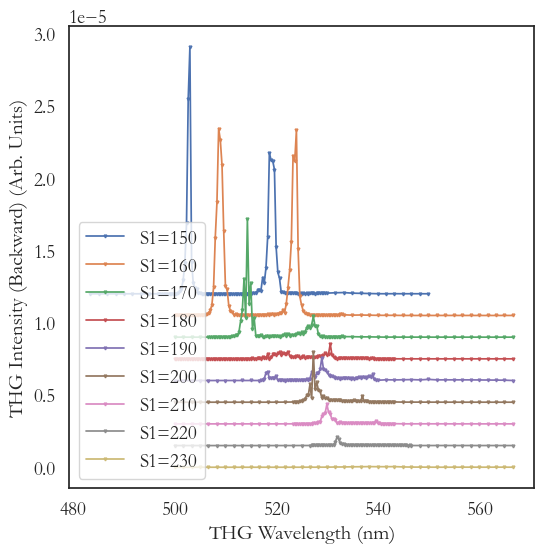

In [13]:
plt.figure(figsize=(6,6))
spacing=15e-7
for i in range(len(S1_list)):
    sub_df = main_df[main_df['S1_nm']==S1_list[i]]
    stack_sep = spacing*(len(S1_list)-1-i)
    plt.plot(sub_df['THGWavelength_nm'],sub_df['THG_Backward']+stack_sep,label='S1=%d' %(S1_list[i]),
             marker='v',fillstyle='none',markersize=2, linewidth=1.25)
plt.legend(loc=3)
#plt.ylim(-0.5e-5,7e-5)
plt.xlabel('THG Wavelength (nm)')
plt.ylabel('THG Intensity (Backward) (Arb. Units)')    
#plt.savefig('COMSOL Simualtion Data/240206-AsymmetrySweep/THG_Backward.png',dpi=200)

### Fano/Lorentzian Fitting

In [13]:
from scipy.optimize import curve_fit

In [14]:
# Fano lineshape for transmission

def fano(wl,wl0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + Tnr*wl**2

def fano_omega(omega,omega0,gamma0,q,TA,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2)

def fano2(wl,wl0,wl02,gamma0,gamma02,q,q2,TA,TA2,Tnr):
    omega = 2*pi*c/wl
    omega0=2*pi*c/wl0
    domega=(omega-omega0)/gamma0
    
    omega2 = 2*pi*c/wl
    omega02=2*pi*c/wl02
    domega2=(omega2-omega02)/gamma02
    return TA/(1+q**2) * (q+domega)**2 / (1+domega**2) + TA2/(1+q2**2) * (q2+domega2)**2 / (1+domega2**2) + Tnr

# Lorentzian lineshape for reflection

def lorentzian(wl,wl0,gamma0,A,B):
    #omega = 2*pi*c/wl
    #omega0=2*pi*c/wl0
    return -A * (0.5*gamma0/((wl-wl0)**2 + (0.5*gamma0**2))) + B

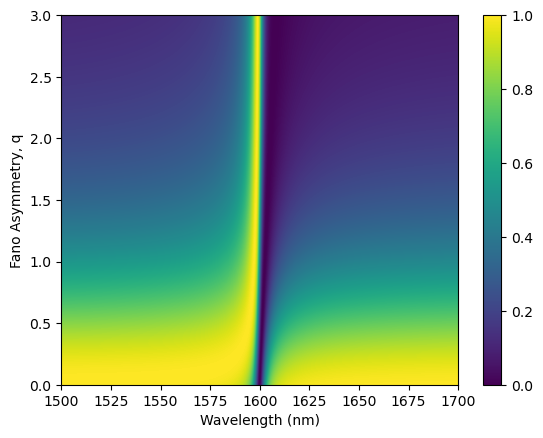

In [15]:
fig = plt.figure()
x1, x2 = np.meshgrid(np.linspace(1500,1700,500), np.linspace(0,3,500))
y = fano(x1,1600,2000,x2,1,0)

plt.imshow(y,extent=[1500,1700,0,3],origin='lower',aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Fano Asymmetry, q')
plt.colorbar()
plt.show()

In [16]:
from scipy.interpolate import interp1d
from scipy import sparse
from scipy.sparse.linalg import spsolve

def baseline_als(y, lam, p, niter=50):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in range(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z
  
def normalize(y_data,lam=10**7,p=0.6):
    y_baseline=baseline_als(y_data,lam,p)
    return y_data-y_baseline

def calc_fit_error(errfunc,optim,pcov,xdata,ydata,guess):
    if (len(ydata) > len(guess)) and pcov is not None:
        s_sq = (errfunc(optim, xdata, ydata)**2).sum()/(len(ydata)-len(guess))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(optim)):
        try:
          error.append(np.absolute(pcov[i][i])**0.5)
        except:
          error.append( 0.00 )
    return np.array(error)   


def calc_Q_error(optim,fit_err):
    Q = optim[0]/optim[1]
    dQ = Q*np.sqrt( (fit_err[0]/optim[0])**2 + (fit_err[1]/optim[1])**2)
    return dQ

In [17]:
  
    

# Data to be fit

bounded = True
wl_start=1560
wl_end=1600

sub_df = main_df[main_df['S1_nm']==160]
if bounded == True:
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
wl_range = np.array(sub_df['PumpWavelength_nm'])
transmission = np.array(sub_df['LinearTransmission ']) 
reflection = np.array(sub_df['LinearReflection']) 

# Reference baseline data 
sub_df_ref = main_df[main_df['S1_nm']==230]
if bounded == True:
    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]
wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
ref_transmission = np.array(sub_df_ref['LinearTransmission '])
ref_reflection = np.array(sub_df_ref['LinearReflection'])

# Interpolate reference data to experimental data
f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
ref_trans_interp = f_trans(wl_range)
ref_refl_interp = f_refl(wl_range)


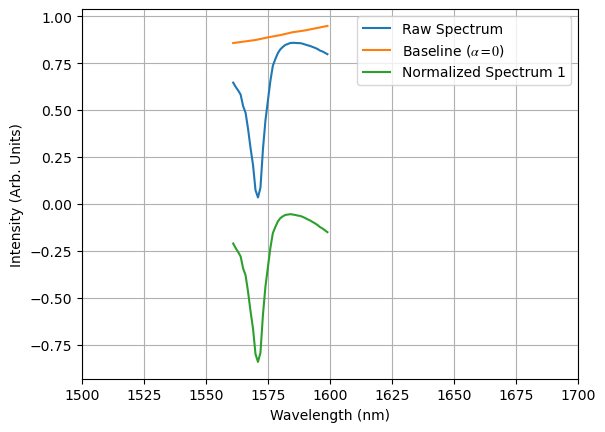

In [18]:
# Background subtract interpolated reference data
norm_trans = transmission-ref_trans_interp
norm_refl = reflection-ref_refl_interp
norm_ref2 = reflection/ref_refl_interp

plt.plot(wl_range,reflection,'-',label='Raw Spectrum',fillstyle='none')
plt.plot(wl_range,ref_refl_interp,label=r'Baseline ($\alpha=0$)')
plt.plot(wl_range,norm_refl,label='Normalized Spectrum 1')
# plt.plot(wl_range,norm_ref2,label='Normalized Spectrum 2')
#plt.plot(wl_range,fano2(wl_range, 1559,  1595,  2490, 1000, -1.0, 5,  0.4, 0.2,0),label='Fit')
#plt.plot(wl_range,lorentzian(wl_range,1581.5,5,4,0),label='Lorentzian')
plt.xlim(1500,1700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (Arb. Units)')
plt.grid()
plt.legend()

[ 1.57048567e+03  4.60241026e+00  3.68658095e+00 -6.38606516e-02]
Q-factor: 341 ± 20.46
[0.09286973 0.2760023  0.19959829 0.00996914]


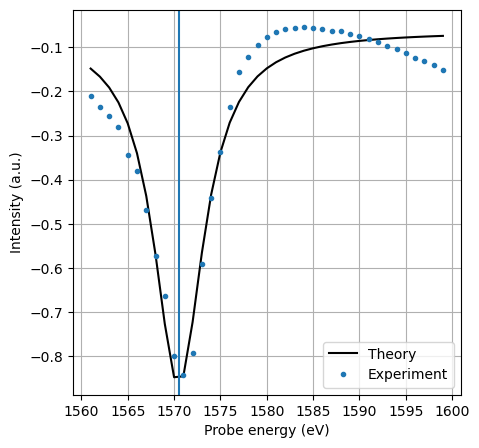

In [19]:
from scipy.optimize import leastsq,least_squares,minimize

errfunc = lambda p,x,y: np.abs(lorentzian(x,*p)-y)**2
guess1=[1560,100,0.17,0.9,0]
guess2=[1575,1610,2561,500,0.38,1.0,0.88,0.57,-1.32]
guess_lo=[1581,2000,2000,0]
optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess_lo[:], args=(wl_range, norm_refl),full_output=True)
# optim, pcov = minimize(errfunc, guess2[:], args=(wl_range, norm_trans),method='SLSQP')#,constraints={[1550,1575],[1580,1610],[0,np.inf],[0,np.inf],[0,2],[0,2],[0,np.inf],[0,np.inf],[-np.inf,np.inf]})

fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess_lo)
dQ = calc_Q_error(optim,fit_err)

#xx=np.linspace(1.44,2.0,1000)
plt.figure(figsize=(5,5))
plt.plot(wl_range,lorentzian(wl_range,*optim),label='Theory',color='black')
plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
plt.axvline(optim[0])
plt.xlabel('Probe energy (eV)')
plt.ylabel('Intensity (a.u.)')
#plt.gca().set_yticklabels(['']*10)
plt.legend(loc='best')
plt.grid()
print(optim)
print('Q-factor: %d ± %0.2f' %(optim[0]/optim[1],dQ))
print(fit_err)

In [20]:
from scipy.optimize import leastsq,least_squares,minimize

def fano_fit(sub_df,sub_df_ref,guess2):
    wl_range = np.array(sub_df['PumpWavelength_nm'])
    transmission = np.array(sub_df['LinearTransmission ']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    ref_transmission = np.array(sub_df_ref['LinearTransmission '])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f(wl_range)
    
    f2 = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    ref_trans_interp = f(wl_range)

    # Background subtract interpolated reference data
    norm_trans = transmission-ref_trans_interp
    
    errfunc = lambda p,x,y: (fano(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, success,infodict,mesg,ier = leastsq(errfunc, guess2[:], args=(wl_range, norm_trans),full_output=True)
    
    plt.plot(c/wl_range,fano(wl_range,*optim),label='Theory',color='black')
    plt.plot(c/wl_range,norm_trans,'o',label='Experiment',markersize=3.0)#,edgecolors='black')
    # plt.plot(wl_range,fano2(wl_range,1558,2899,0.17,0.9,0.9, 1.59898359e+03,  6.90351242e+04,  2.53265622e+00,0.9, 0.9))
    #plt.xlim(1.47,1.86)
    #plt.ylim(-0.5,0.5)
    #plt.title('Peak1=%d, Gamma1=%d, Q1=%d, q1=%0.1f, TA1=%0.1f \n Peak2=%d, Gamma2=%d, Q2=%d, q2=%0.1f, TA2=%0.1f' 
    #          %(optim[0],optim[2],(optim[0])/optim[2],optim[4],optim[6],optim[1],optim[3],(optim[1])/optim[3],optim[5],optim[7]))
    plt.xlabel('Probe energy (eV)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()
    

def lorentzian_fit(sub_df,sub_df_ref,guess,wl_start,wl_end):
    
    sub_df = sub_df[(sub_df['PumpWavelength_nm']>wl_start) & (sub_df['PumpWavelength_nm']<wl_end)]
    sub_df_ref = sub_df_ref[(sub_df_ref['PumpWavelength_nm']>wl_start) & (sub_df_ref['PumpWavelength_nm']<wl_end)]

    wl_range = np.array(sub_df['PumpWavelength_nm'])
    # transmission = np.array(sub_df['LinearTransmission']) 
    reflection = np.array(sub_df['LinearReflection']) 

    # Reference baseline data 
    wl_range_ref=np.array(sub_df_ref['PumpWavelength_nm'])
    #ref_transmission = np.array(sub_df_ref['LinearTransmission'])
    ref_reflection = np.array(sub_df_ref['LinearReflection'])

    # Interpolate reference data to experimental data
    #f_trans = interp1d(wl_range_ref, ref_transmission,fill_value='extrapolate')
    #ref_trans_interp = f_trans(wl_range)
    
    #f_refl = interp1d(wl_range_ref, ref_reflection,fill_value='extrapolate')
    #ref_refl_interp = f_refl(wl_range)

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection #/ref_refl_interp

    # Background subtract interpolated reference data
    #norm_trans = transmission-ref_trans_interp
    norm_refl = reflection#-ref_refl_interp
    
    errfunc = lambda p,x,y: (lorentzian(x,*p)-y)**2
    # guess1=[1550,2899,0.17,0.9,0]
    # guess2=[1557,1592,2561,1398,0.38,0.49,0.88,0.57,-1.32]
    optim, pcov,infodict,mesg,ier = leastsq(errfunc, guess[:], args=(wl_range, norm_refl),full_output=True)
    fit_err = calc_fit_error(errfunc,optim,pcov,wl_range,norm_refl,guess)
    dQ = calc_Q_error(optim,fit_err)
    
    print(optim)
    print(fit_err)

    plt.figure(figsize=(4,4))
    plt.title(r'$\lambda_0$=%0d, $\delta \lambda$ = %0.1f, Q=%d (%d)' %(optim[0], optim[1],optim[0]/(2*optim[1]),dQ))
    plt.plot(wl_range,lorentzian(wl_range,*optim),label='Lorentzian Fit',color='black')
    plt.plot(wl_range,norm_refl,'o',label='Experiment',markersize=3.0,fillstyle='none')#,edgecolors='black')
    plt.axvline(optim[0],linestyle='--',alpha=0.5)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (a.u.)')
    #plt.gca().set_yticklabels(['']*10)
    plt.legend(loc='best')
    plt.show()


### Individual Fits

#### S1 = 220nm

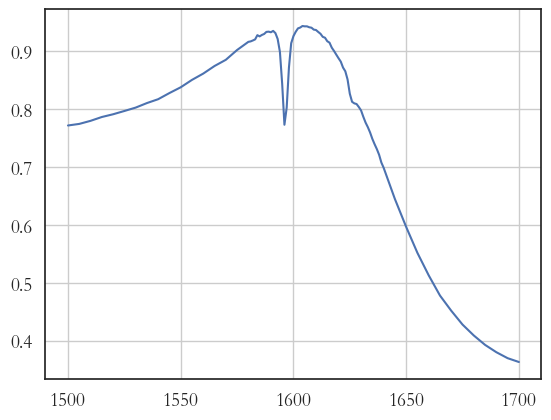

In [84]:
sub_df = main_df[main_df['S1_nm']==220]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.59626699e+03 2.04534981e+00 3.78970734e-01 9.50924038e-01]
[0.01296151 0.03439287 0.00627101 0.00102659]


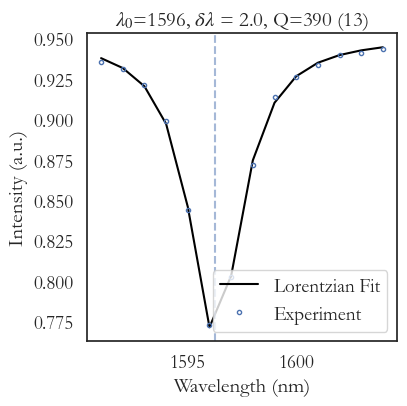

In [85]:
guess1=[1595,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1590,1605)

#### S1 = 210nm

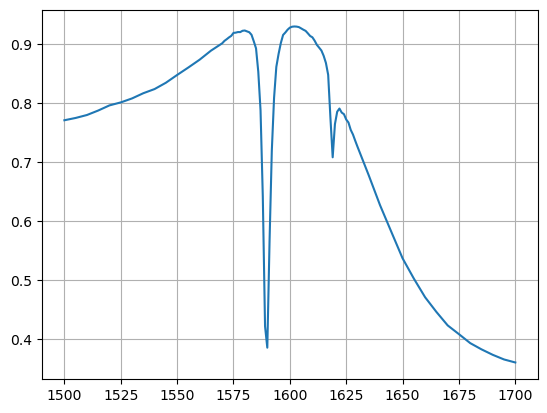

In [24]:
sub_df = main_df[main_df['S1_nm']==210]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.58969302e+03 2.40903507e+00 1.42382663e+00 9.43527083e-01]
[0.01672846 0.04323593 0.02636685 0.00290378]


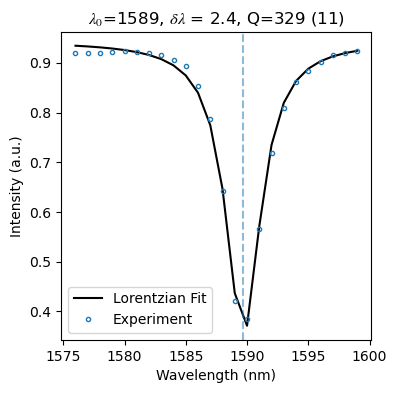

[1.61925086e+03 3.64647944e+00 9.25269651e-01 9.77639108e-01]
[ 0.78272841 16.93758438  9.34385694  1.40885379]


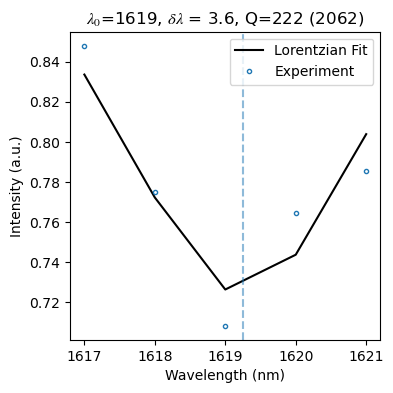

In [26]:
guess1=[1590,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1575,1600)

guess2=[1620,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1616,1622)

#### S1 = 200nm

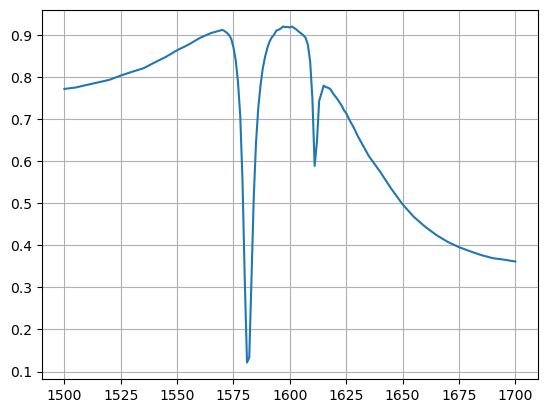

In [21]:
sub_df = main_df[main_df['S1_nm']==200]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.58158509e+03 3.42027966e+00 2.94950020e+00 9.50030099e-01]
[0.02404305 0.07247754 0.06369674 0.00519707]


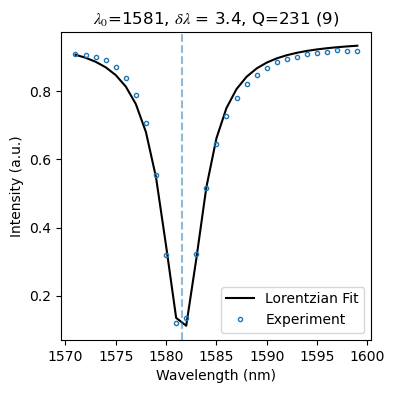

[1.61157414e+03 1.96228872e+00 5.41140619e-01 8.62174274e-01]
[0.20050428 0.91330022 0.25317685 0.03060525]


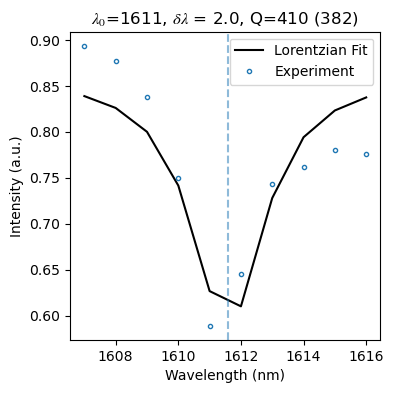

In [23]:
guess1=[1580,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1570,1600)
guess2=[1610,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1606,1617)

#### S1 = 190nm

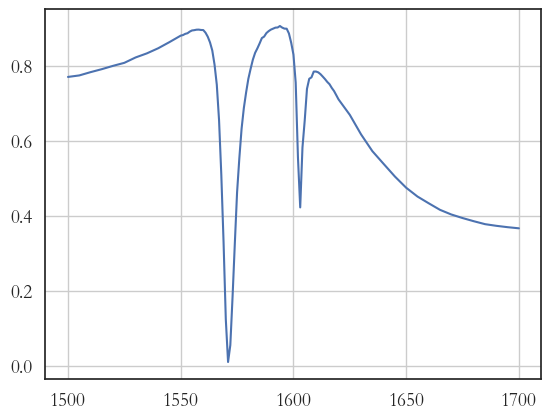

In [101]:
sub_df = main_df[main_df['S1_nm']==190]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.57163089e+03 4.78910586e+00 4.49121209e+00 9.42482439e-01]
[0.05091337 0.18408843 0.18577161 0.01137425]


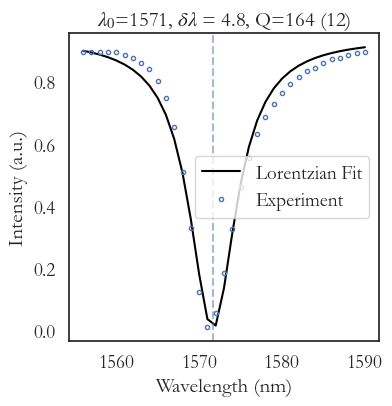

[1.60316783e+03 2.20551486e+00 9.30268656e-01 8.66553664e-01]
[0.11660808 0.38261662 0.13247124 0.01462024]


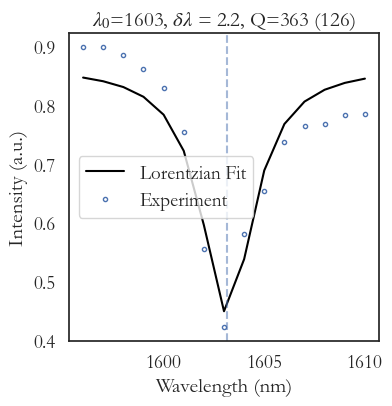

In [104]:
guess1=[1570,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1555,1590)
guess2=[1605,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1595,1610)

#### S1 = 180nm

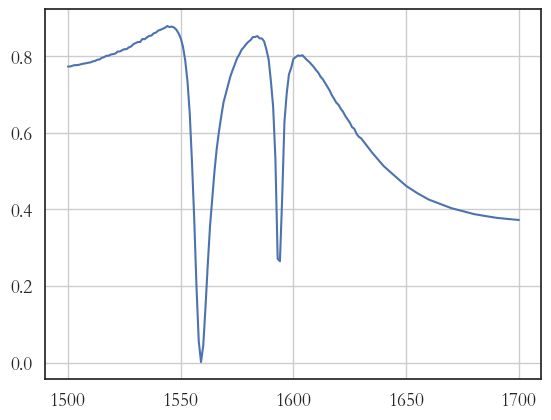

In [105]:
sub_df = main_df[main_df['S1_nm']==180]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.55977320e+03 5.92460720e+00 5.38201976e+00 9.05956940e-01]
[0.08752297 0.31128026 0.28645532 0.0138875 ]


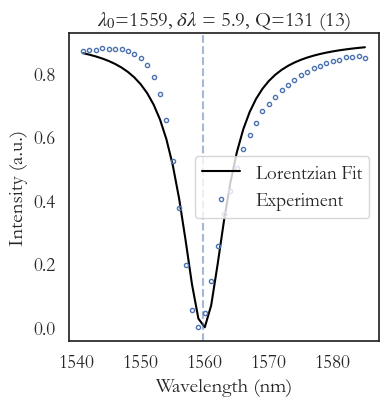

[1.59367595e+03 2.21904065e+00 1.37946645e+00 8.26926892e-01]
[0.05556062 0.17173069 0.08916196 0.00519629]


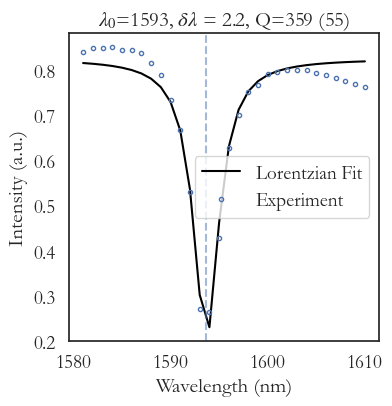

In [106]:
guess1=[1560,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1540,1585)
guess2=[1590,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1580,1610)

#### S1 = 170nm

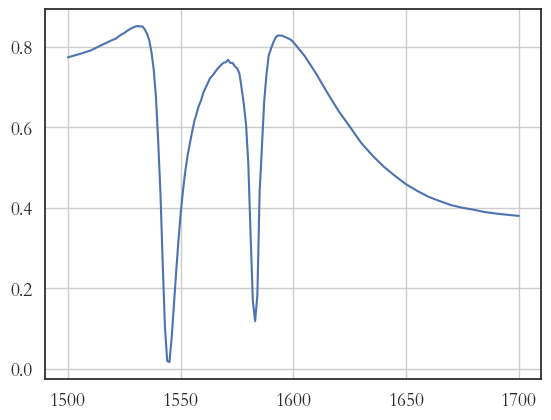

In [107]:
sub_df = main_df[main_df['S1_nm']==170]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.54573731e+03 6.50390566e+00 5.53609197e+00 8.53491916e-01]
[0.16260825 0.57489724 0.50228687 0.0215966 ]


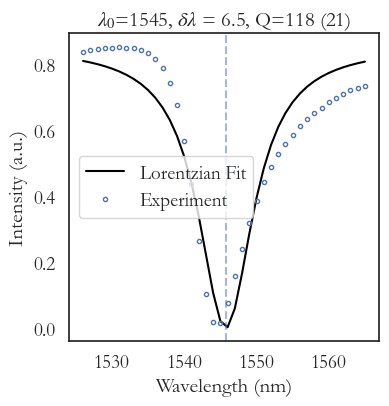

[1.58282061e+03 3.20284812e+00 2.38534591e+00 8.16644517e-01]
[0.06494924 0.15817816 0.10557447 0.00589227]


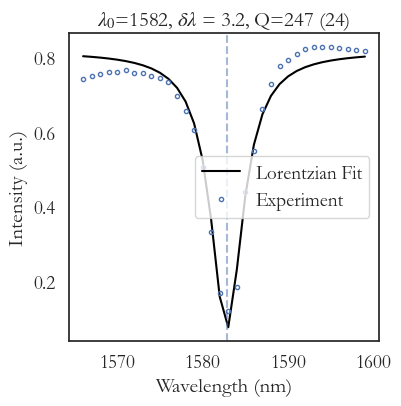

In [108]:
guess1=[1540,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1525,1565)
guess2=[1580,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1565,1600)

#### S1 = 160nm

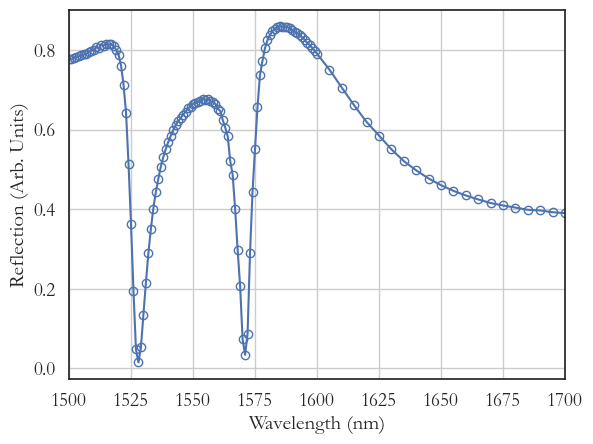

In [109]:
sub_df = main_df[main_df['S1_nm']==160]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'],'o-',fillstyle='none')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflection (Arb. Units)')
plt.xlim(1500,1700)
plt.grid()

[1.52922754e+03 6.48138676e+00 5.13620508e+00 8.11859991e-01]
[0.23463439 1.44483199 1.46221489 0.08371091]


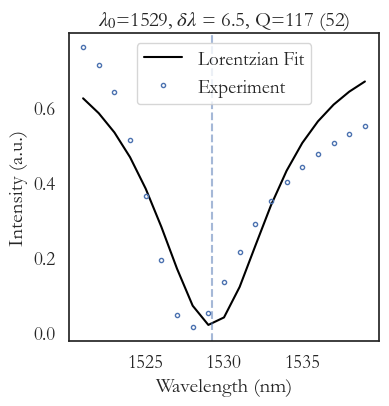

[1.57039341e+03 4.17190778e+00 3.30418444e+00 7.86152441e-01]
[0.15924713 0.46680345 0.31316644 0.0145662 ]


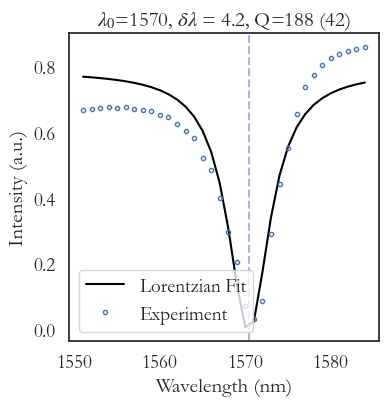

In [110]:
guess1=[1526,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1520,1540)
guess2=[1570,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1550,1585)

#### S1 = 150nm

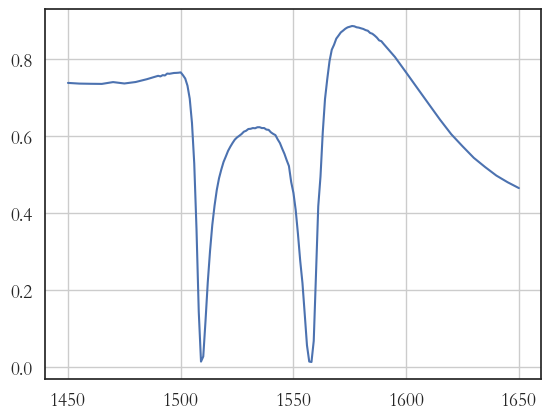

In [111]:
sub_df = main_df[main_df['S1_nm']==150]
sub_df_ref = main_df[main_df['S1_nm']==230]
plt.plot(sub_df['PumpWavelength_nm'],sub_df['LinearReflection'])
plt.grid()

[1.51035881e+03 4.56236185e+00 3.31299482e+00 7.25438389e-01]
[0.20862071 0.79201271 0.59163652 0.03646725]


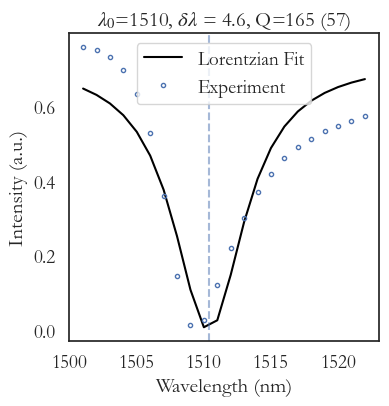

[1.55638672e+03 5.34695833e+00 4.28609840e+00 7.52564523e-01]
[0.24468485 0.66685451 0.48082255 0.01952745]


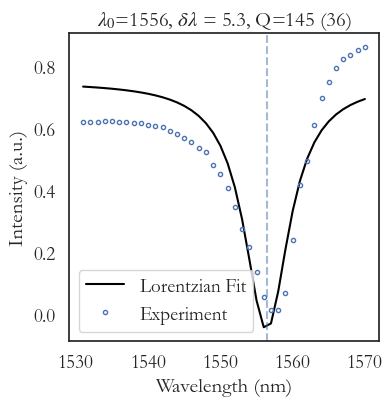

In [112]:
guess1=[1510,2.382,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess1,1500,1522)
guess2=[1560,2,1.411,0.02]
lorentzian_fit(sub_df,sub_df_ref,guess2,1530,1570)

### Enhancement

[0.060031]


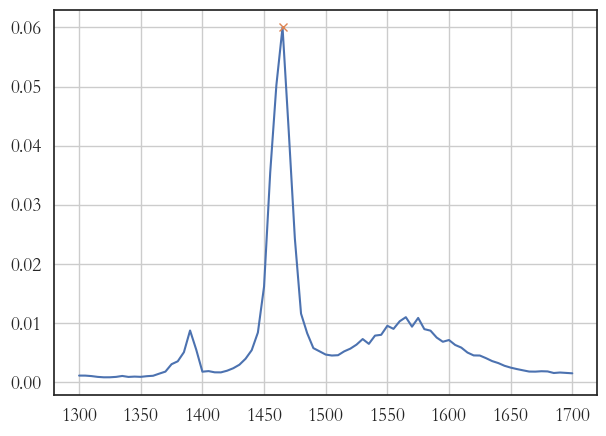

In [440]:
from scipy.signal import find_peaks


sub_df = main_df[main_df['S1_nm']==100]
relE = np.array(sub_df['RFE_THG'])
peaks,_ = find_peaks(relE,height=0.5*max(relE))
plt.plot(sub_df['PumpWavelength_nm'],relE)
plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
plt.grid()
print(relE[peaks])

0 [1.76957675e-08 1.12468139e-08]


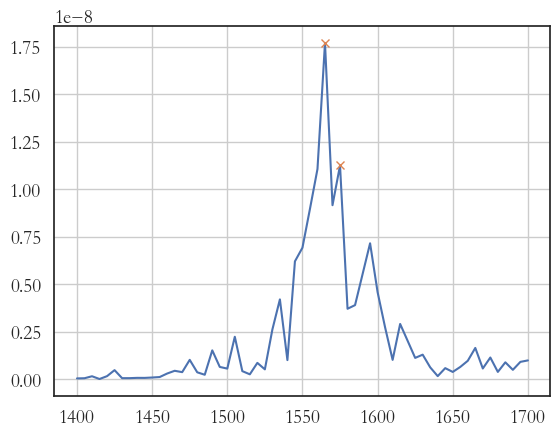

50 [1.48665618e-08 1.73168257e-08 2.21353049e-08]


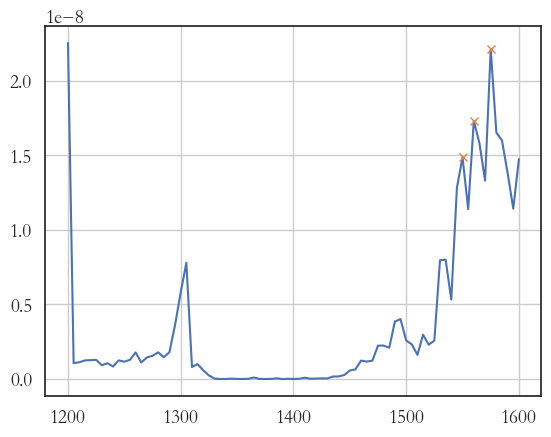

110 [4.45244248e-06]


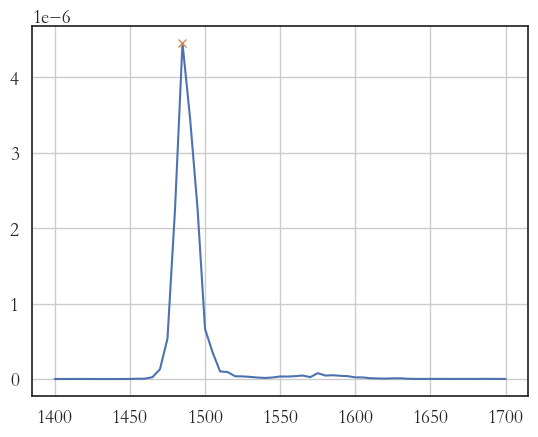

120 [5.97548477e-06]


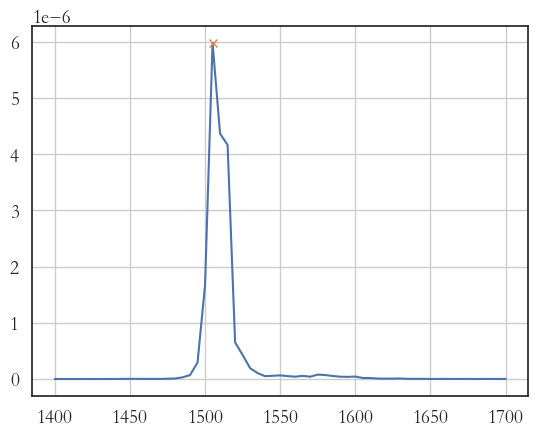

130 [9.88344716e-07]


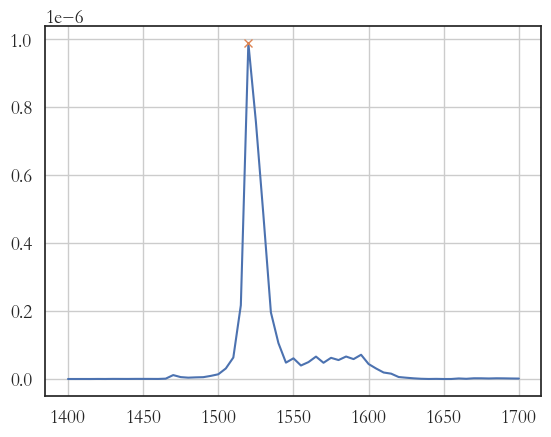

140 [4.54703034e-07 6.55680461e-07 6.03870253e-07 5.21748919e-07
 6.32705029e-07]


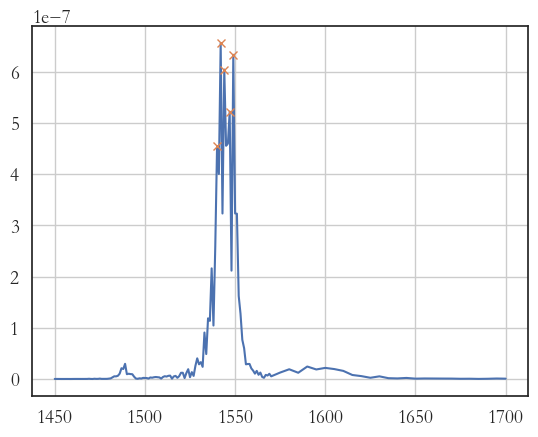

150 [5.22413652e-07]


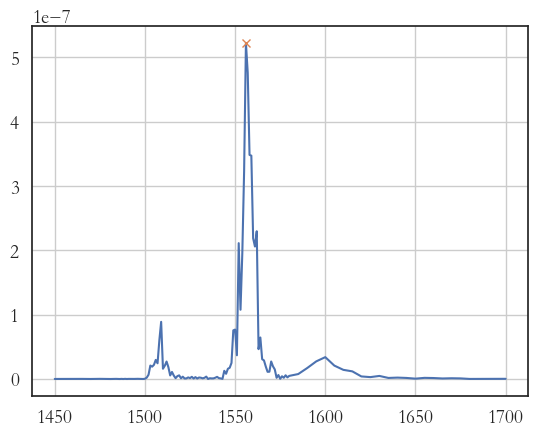

160 [1.18050133e-07 1.50512564e-07 1.66825225e-07 1.46281819e-07
 1.98606450e-07 1.34658652e-07]


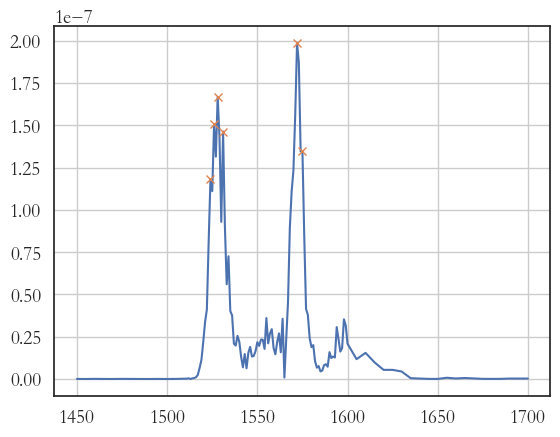

170 [1.33229412e-07 1.63181478e-07 1.22387169e-07 1.03745783e-07
 9.05340025e-08 8.83505326e-08 9.09066165e-08 1.12719657e-07]


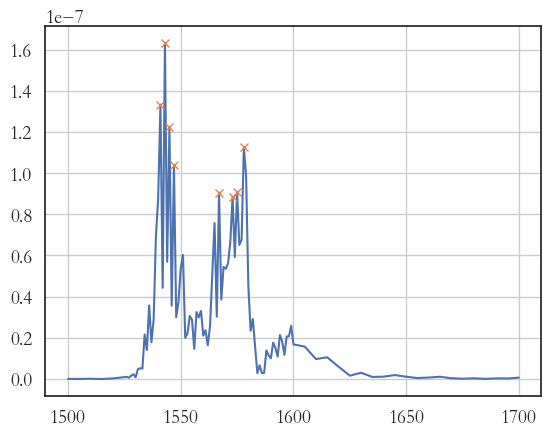

180 [9.97676957e-08 5.58171205e-08 5.70014293e-08 5.77083048e-08
 8.17717286e-08 7.77558567e-08 8.23976851e-08]


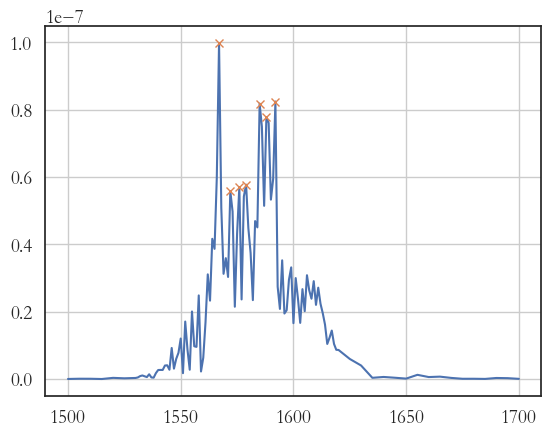

190 [4.69404731e-08 4.22101123e-08 4.81281731e-08 6.92691110e-08
 7.39361619e-08 7.49395140e-08 8.35599809e-08 8.07517644e-08
 6.72715523e-08 6.97232478e-08]


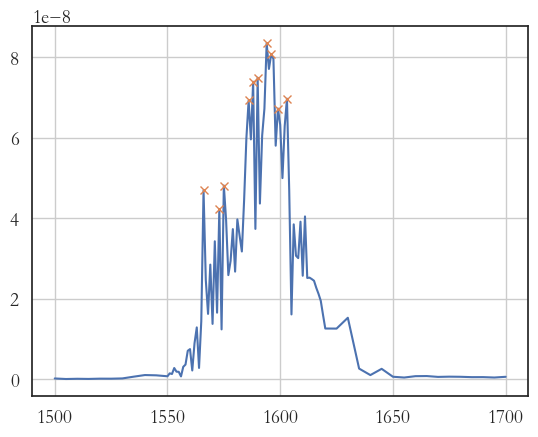

200 [3.23134124e-08 3.97138650e-08 4.20440153e-08 5.60760060e-08
 6.02508976e-08 5.71370851e-08 4.15953393e-08 4.63715061e-08
 4.77720831e-08 3.08820689e-08 3.31515482e-08]


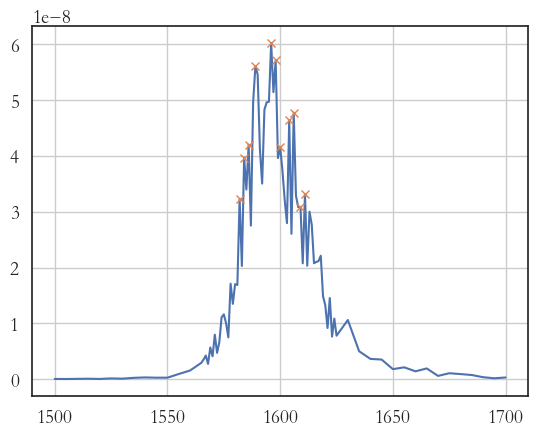

210 [2.47185828e-08 2.90971362e-08 3.71289959e-08 2.36403831e-08
 3.89668747e-08 3.47966771e-08 2.19333626e-08]


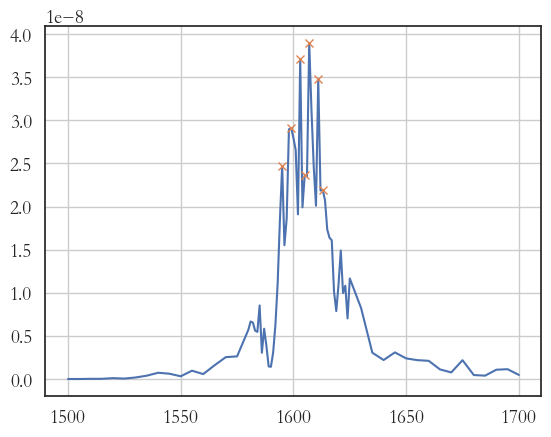

220 [1.64403760e-08 2.69267876e-08 2.84749609e-08 2.94260320e-08
 3.12958558e-08 2.85746123e-08 2.36064682e-08 2.39914262e-08
 2.32730010e-08]


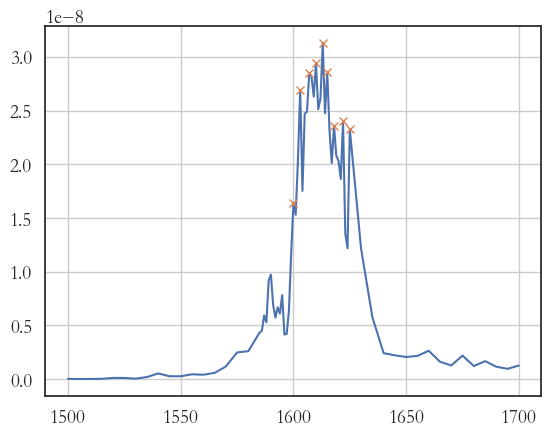

230 [2.46354019e-08 2.35508855e-08]


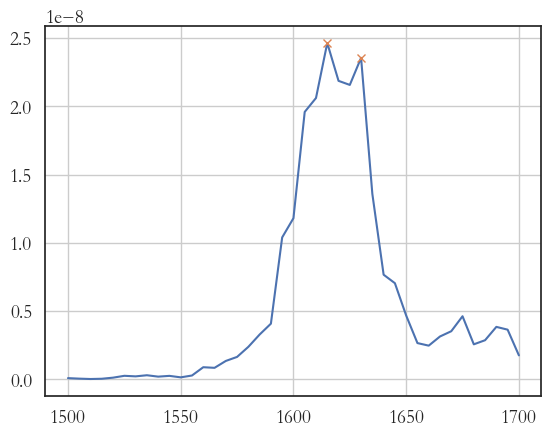

999 [5.98206978e-10]


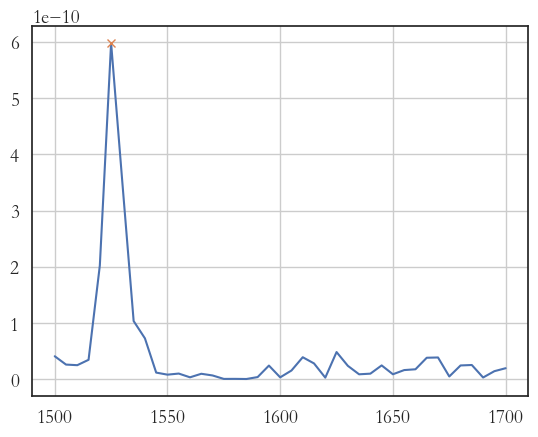

In [275]:
for i in S1_list:
    sub_df = main_df[main_df['S1_nm']==i]
    relE = np.array(sub_df['THG_Backward'])
    peaks,_ = find_peaks(relE,height=0.5*max(relE))
    plt.plot(sub_df['PumpWavelength_nm'],relE)
    plt.plot(sub_df['PumpWavelength_nm'].iloc[peaks],relE[peaks],'x')
    plt.grid()
    print(i,relE[peaks])
    plt.show()

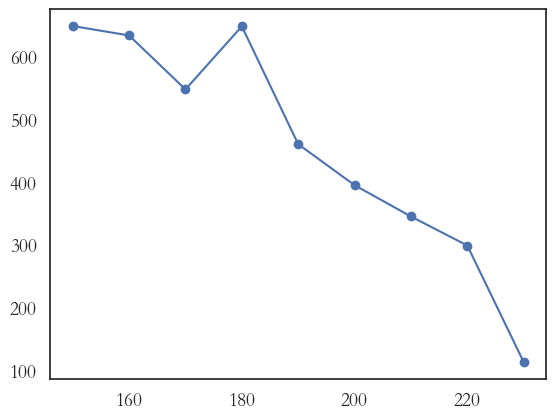

In [115]:
integ_int=[]
for i in S1_list:
    sub_df = main_df[main_df['S1_nm']==i]
    relE = np.array(sub_df['RelativeFieldEnhancement'])
    integ_int.append(np.sum(relE))
plt.plot(S1_list,integ_int,'o-')

### Q-factor Analysis

In [14]:
results = pd.read_excel('../COMSOL Simulation - THG SiMS/240206-AsymmetrySweep_NoLoss/240215 - Results - Reprocessed.xlsx',index_col=None)

In [15]:
results=results.drop([8,9])

In [16]:
results

,S2,S1,dS,Asymmetry,Peak1,Linewidth1,Q-factor1,Qf1-err,Peak2,Linewidth2,...,Qf2-err,THGF1,THGF2,THGB1,THGB2,FE1_Pump,FE2_pump,FE1_THG,FE2_THG,E0
0,230,140,90,0.391304,1510,5.0,302,0,1555,6.0,...,25,0.000011,2.450000e-05,2.200000e-06,4.000000e-06,10.814,8.5516,0.2528,0.1714,86802000
1,230,150,80,0.347826,1510,4.6,165,57,1556,5.3,...,36,0.000010,2.750000e-05,1.600000e-05,1.000000e-05,12.060,9.1400,0.3357,0.2463,86802000
2,230,160,70,0.304348,1529,6.5,117,52,1570,4.2,...,42,0.000008,3.500000e-05,1.200000e-05,1.200000e-05,11.192,9.6300,0.2503,0.2800,86802000
3,230,170,60,0.260870,1545,6.5,118,21,1582,3.2,...,24,0.000004,5.000000e-06,8.000000e-06,1.000000e-06,10.665,9.7870,0.1932,0.2620,86802000
4,230,180,50,0.217391,1559,5.9,131,13,1593,2.2,...,55,0.000003,3.500000e-06,4.000000e-07,1.000000e-06,10.405,9.5700,0.1971,0.2148,86802000
5,230,190,40,0.173913,1571,4.8,164,12,1603,2.2,...,126,0.000009,5.000000e-07,6.000000e-07,1.000000e-06,10.680,9.0130,0.2037,0.1386,86802000
6,230,200,30,0.130435,1581,3.4,231,9,1611,1.0,...,382,0.000020,5.000000e-07,3.500000e-06,5.000000e-07,10.550,7.8000,0.1700,0.0853,86802000
7,230,210,20,0.086957,1589,2.4,329,11,1619,1.0,...,0,0.000008,2.500000e-07,1.400000e-06,2.000000e-07,8.670,6.7300,0.0973,0.0133,86802000


In [31]:
def Qtot(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def Qtot2(alpha,Qnr):
    # alpha_opt=np.sqrt(Q0/Qnr)
    alpha_opt = 0.4055
    return Qnr/((alpha**2 / alpha_opt**2) + 1) 

def THG_enhancement(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    alpha_p = alpha**2 / alpha_opt**2
    return Qnr**3 * (alpha_p/(alpha_p+1)**2)**3

Text(0, 0.5, 'THG Efficiency (Arb. Units)')

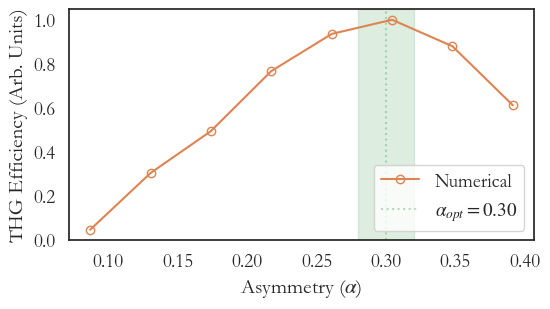

In [17]:
asy_range = np.linspace(0.05,0.45)

I0=1e13 
E0=np.sqrt(2*I0/(c*epsilon_0))

THG_nonlinearity = results['FE2_THG']/E0**2
THG_nonlinearity2 = THG_nonlinearity/max(THG_nonlinearity)
THG_conv_eff = results['FE2_THG']**2/max(results['FE2_THG']**2)

plt.figure(figsize=(6,3))
plt.axvline(0.3,linestyle=':',alpha=0.4,color='C2',label=r'$\alpha_{opt}=%.2f$' %(0.30))
plt.axvspan(0.28,0.32,alpha=0.2,color='C2')
#plt.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),label='Model',color='k')
#plt.plot(results['Asymmetry'],THG_conv_eff,marker='o',fillstyle='none',label='THG Conversion')
plt.plot(results['Asymmetry'],THG_nonlinearity2,marker='o',fillstyle='none',label='Numerical',color='C1')

plt.legend(loc=4,reverse=True)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('THG Efficiency (Arb. Units)')
#plt.xlim(0.05,0.45)

(0.07695652173913044, 0.401304347826087)

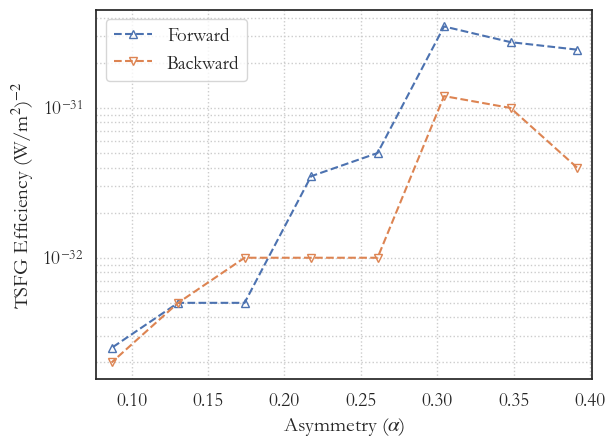

In [18]:
I_THG = 0.5*c*epsilon_0*(results['FE2_THG']*E0)**2
#TSFG_efficiency1 = I_THG/I0**2
TSFG_efficiency_F = results['THGF2'] /I0**2
TSFG_efficiency_B = results['THGB2'] /I0**2
plt.semilogy(results['Asymmetry'],TSFG_efficiency_F,'^--',label='Forward',fillstyle='none')
plt.semilogy(results['Asymmetry'],TSFG_efficiency_B,'v--',label='Backward',fillstyle='none')
plt.legend()
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel(r'TSFG Efficiency (W/m$^2$)$^{-2}$')
plt.grid(True, which="both", ls=':')
plt.xlim(min(results['Asymmetry'])-0.01,max(results['Asymmetry'])+0.01)
#plt.savefig('TSFG_Efficiency',dpi=200,bbox_inches='tight')
#plt.axhline(3.6e-33)
#plt.axhline(3.5e-31)

[-462.54751734 1617.16552338]


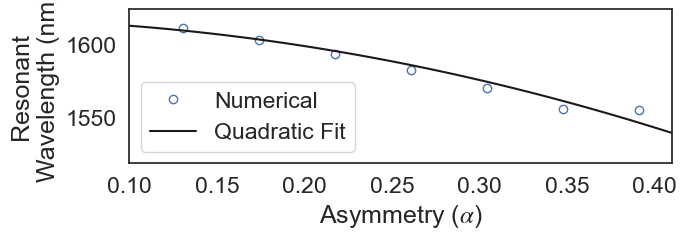

In [27]:
from scipy.optimize import curve_fit
asy_range = np.linspace(0.05,0.45)
def quad(x,a,b):
    return a*x**2 + b

sns.set(font_scale=1.5,style='white', palette='deep',font='Arial')
popt, pcov = curve_fit(quad, results['Asymmetry'], results['Peak2'])
plt.figure(figsize=(7,2))
plt.plot(results['Asymmetry'],results['Peak2'],'o',fillstyle='none',label='Numerical')
plt.plot(asy_range,quad(asy_range,*popt),'k-',label='Quadratic Fit')
plt.legend(loc=3)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('Resonant\nWavelength (nm)')
plt.xlim(0.1,0.41)
print(popt)

In [19]:
# General calculation of TOSPDC Rate

# Wavelength parameters
# lp = 500.3e-9 # 520nm
# l1 = 3*lp # 1560nm
l1 = (-462.547*results['Asymmetry'] + 1617.165)*1e-9
lp = l1/3
lw = 4e-9 # 50nm # Laser or detection bandwidth?
spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

# Geometric parameters
meta_area = ((1-results['Asymmetry'])*230e-9+230e-9)*570e-9 # m^2
unit_cell = 680e-9**2 #m^2
beam_spot = pi*(5e-6)**2 # m^2

# THG Simulation Results

spdc_pump_flux = 12e13  # 1e13 W/m^2 = 1 GW/cm^2
TSFG_efficiency_f = 3e-31*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)

TOPDC_F = hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_F * spdc_pump_flux * beam_spot
TOPDC_B = hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_B * spdc_pump_flux * beam_spot

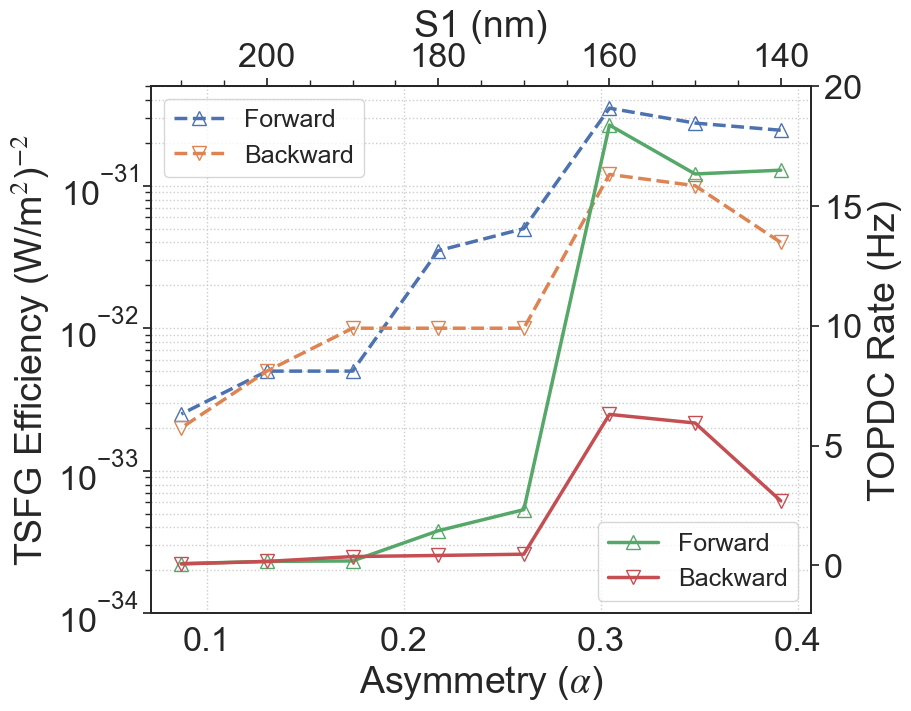

In [26]:
from matplotlib.ticker import AutoMinorLocator
sns.set(font_scale=2.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(9,5)})

fig, ax = plt.subplots(layout='constrained',figsize=(9,7))
plt.semilogy(results['Asymmetry'],TSFG_efficiency_F,'^--',label='Forward',fillstyle='none',linewidth=2.5,markersize=10)
plt.semilogy(results['Asymmetry'],TSFG_efficiency_B,'v--',label='Backward',fillstyle='none',linewidth=2.5,markersize=10)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel(r'TSFG Efficiency (W/m$^2$)$^{-2}$')
plt.legend(loc=2,fontsize=18)
plt.grid(True, which="both", ls=':')
#plt.xlim(min(results['Asymmetry'])-0.01,max(results['Asymmetry'])+0.01)
#plt.xlim(0.15,0.6)
plt.ylim(1e-34,5e-31)
#plt.savefig('TSFG_Efficiency',dpi=200,bbox_inches='tight')
#plt.axvline(0.45)
#plt.axhline(3.5e-31)

def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'S1 (nm)')


ax2 = ax.twinx()
#ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
ax2.plot(results['Asymmetry'],TOPDC_F,marker='^',linestyle='-',fillstyle='none',color='C2',label='Forward',linewidth=2.5,markersize=10)
ax2.plot(results['Asymmetry'],TOPDC_B,marker='v',linestyle='-',fillstyle='none',color='C3',label='Backward',linewidth=2.5,markersize=10)
# ax2.arrow(0.55,THG_enhancement(0.55,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.085,0.0,color='C1',width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
ax2.set_ylim([-2,20])
ax2.set_ylabel('TOPDC Rate (Hz)')
ax2.legend(loc=4,fontsize=18)

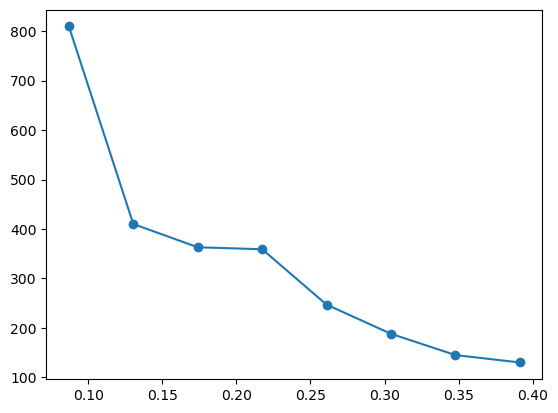

In [35]:
plt.plot(results['Asymmetry'], results['Q-factor2'],'o-')
#plt.plot(results['Asymmetry'][4:13], results['Q-factor2'][4:13],'o-')

In [36]:
from scipy.optimize import leastsq
errfunc2 = lambda p,x,y: np.abs(Qtot2(x,*p)-y)**2
errfunc3 = lambda p,x,y: np.abs(THG_enhancement(x,*p)-y)**2
guess=[8,2000]
guess1=[400]
optim1, success,infodict,mesg,ier = leastsq(errfunc2, guess1[:], args=(results['Asymmetry'], results['Q-factor2']),full_output=True)
optim2, success,infodict,mesg,ier = leastsq(errfunc3, guess[:], args=(results['Asymmetry'], results['FE2_THG']),full_output=True)

In [37]:
# calculate optimal asymmetry from FE2_THG fitting
aa=np.sqrt(optim2[0]/optim2[1])
print(aa)

0.2733273036534043


In [38]:
optim1, optim2

(array([576.68576749]), array([0.19397014, 2.59638356]))

In [39]:
optim1

array([576.68576749])

In [40]:
577*aa**2

43.10640921024804

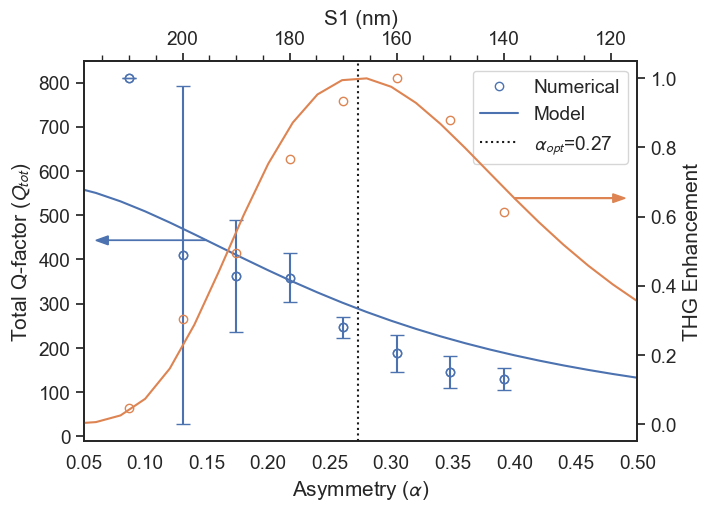

[ 1.57048567e+03  4.60241026e+00  3.68658095e+00 -6.38606516e-02]


In [73]:
Q0=43
Qnr=577
asy_range = np.linspace(0.02,1)

from matplotlib.ticker import AutoMinorLocator
matplotlib.rcParams['mathtext.fontset'] = 'stixsans'

fig, ax = plt.subplots(layout='constrained')
#plt.figure(figsize=(7,5))
sns.set(font_scale=1.25,style='white', palette='deep',font='Arial',rc = {'figure.figsize':(7,5)})
#plt.axhspan(optim[0]/2-100,optim[0]/2+100 ,color='C2',alpha=0.2)
#plt.axhline(optim[0]/2,color='C2',linestyle=':',alpha=0.8,label=r'$Q_{rad}=Q_{par}$')
plt.axvline(np.sqrt(Q0/Qnr),linestyle=':',color='k',label=r'$\alpha_{opt}$=%0.2f' %(np.sqrt(Q0/Qnr)))
plt.plot(asy_range,Qtot(asy_range,Q0,Qnr),label=r'Model',color='C0',linewidth=1.5)
plt.plot(results['Asymmetry'],results['Q-factor2'],'o',label='Numerical',color='C0',fillstyle='none')
plt.errorbar(results['Asymmetry'],results['Q-factor2'],results['Qf2-err'],fmt='o',capsize=5,color='C0',fillstyle='none')
plt.arrow(0.15,Qtot(0.15,Q0,Qnr),-0.09,0,color='C0',length_includes_head=True,width=0.002,head_width=20,head_length=0.01)
plt.legend(reverse=True,loc=1)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel(r'Total Q-factor ($Q_{tot}$)')
plt.xlim(0.05,0.5)


def asytoS1(asy):
    return 230-(asy*230)

def S1toasy(S1):
    return (230-S1)/230

secax = ax.secondary_xaxis('top', functions=(asytoS1, S1toasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'S1 (nm)')

ax2 = ax.twinx()
ax2.plot(asy_range,THG_enhancement(asy_range,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),color='C1',linewidth=1.5)
ax2.plot(results['Asymmetry'],results['FE2_THG']/max(results['FE2_THG']),marker='o',linestyle='none',fillstyle='none',color='C1')
ax2.arrow(0.4,THG_enhancement(0.4,Q0,Qnr)/max(THG_enhancement(asy_range,Q0,Qnr)),0.09,0.0,color='C1',length_includes_head=True,width=0.002,head_width=0.025,head_length=0.01)
#ax2.plot(np.sqrt(Q0/Qnr),THG_enhancement(np.sqrt(Q0/Qnr),Q0,Qnr),marker='o',markersize=8,color='k',fillstyle='none')
#ax2.set_ylim([0.5e7,0.3e9])
ax2.set_ylabel('THG Enhancement')
plt.show()

#plt.savefig('Q-Factor_Results_Qnr=150.png',dpi=200,bbox_inches='tight')
print(optim)

In [74]:
Q0, Qnr

(43, 577)